# Training models
## Linear regression
For $n$ number of feature values $x_i$, the predicted value is:

\begin{equation}
\hat{y}=h_\mathbf{\theta}\left(\mathbf{x}\right)=\mathbf{\theta}\cdot\mathbf{x}=\mathbf{\theta}^\mathbf{T}\mathbf{x}=\theta_0+\theta_1x_1+\ldots+\theta_nx_n
\end{equation}

With model parameters: **bias** (`.intercept_`): $\theta_0$, **feature weights** (`.coef_`): $\theta_n$. In the vectorize form, $\mathbf{\theta}$: parameter vector, $\mathbf{x}$: feature vector (with $x_0=1$).

E.g., some linear-looking data was generated by Gaussian noise on y. Then, $\mathbf{x}$ is updated by `np.c_[np.ones((100, 1)), X]`. Here, the mean squared error (MSE) should be used, although, sometimes other cost functions are preferred in sklearn:

\begin{equation}
MSE\left(\mathbf{\theta}\right)=\frac{1}{m}\sum_{i=1}^{m}\left(\mathbf{\theta}^T\mathbf{x}^{\left(i\right)}-y^{\left(i\right)}\right)^2
\end{equation}

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


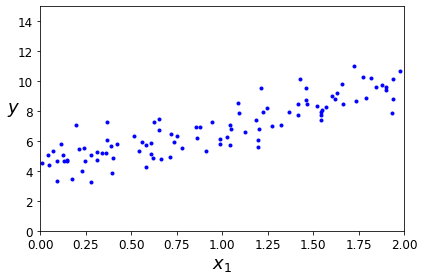

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

### Normal Equation
The closed-form solution for the minimization of MSE is [7]:

\begin{equation}
\hat{\mathbf{\theta}}=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}

$\mathbf{y}$ and $\hat{\mathbf{\theta}}$ are the vectors of the target and minimized values. This equation, however, may not handle some of ***edge cases***, i.e., the input values in a code that require special handling.

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


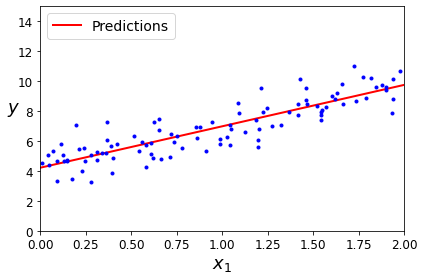

In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

### SVD
When the linear system is singular, e.g., due to an invertible matrix or when the it is overdetermined, the pseudoinverse solves the system by finding a solution with the minimum of its least square errors. For this, the matrix factorization method, `np.linalg.svd()`, **Singular Value Decomposition**, is used to split each matrix $\mathbf{A}$ into two rotational, which are orthogonal ($\mathbf{U}^\mathbf{T}=\mathbf{U}^{-\mathbf{1}}$), and one re-scaling sub-transformations:

<img src="img/Picture1.png" width="200px">
<center>SVD [8].</center>

By `np.linalg.eig()`, computing the eigenvalues $\lambda_i$ along with eigenvectors of ${\mathbf{AA}}^\mathbf{T}$ and $\mathbf{A}^\mathbf{T}\mathbf{A}$ as $u_i$ and $v_i$, we have

<img src="img/Picture3.jpg" width="200px">
<center>Left and right singular matrices [9].</center>

And for $\mathbf{D}$:

<img src="img/Picture4.jpg" width="200px">
<center>Matrix of singular values [9].</center>

Then, the Moore-Penrose pseudoinverse $\mathbf{A}^+$ is:

\begin{equation}
\mathbf{A}^+=\mathbf{V}\mathbf{D}^+\mathbf{U}^T
\end{equation}

$\mathbf{D}^+$ sets small elements of $\mathbf{D}$ zero and replace others with their inverse. Therefore, use `LinearRegression()` or `np.linalg.lstsq()`, which uses `np.linalg.pinv()` to get

\begin{equation}
\hat{\mathbf{\theta}}=\mathbf{X}^+\mathbf{y}
\end{equation}

The SDV ***computational complexity***, i.e., training runtime, is $O(n^2)$ with n is number of features, comparing to $O(n^{2.4})$ to $O(n^3)$ of Normal Equation, as particularly $\mathbf{X}^T\mathbf{X}$ it has $\left(n+1\right)\times\left(n+1\right)$ elements. Therefore, they both are weak in large $n$, but their predictions runtime is linear with number of features or instances, which is similar to GD.

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### Gradient descent
**GD** is an iterative optimization algorithm starting from a ***random initialization*** and searching in the model’s ***parameter space***, traveling down its slope (***gradient***), to converge a minimum. In SG, the ***learning rate*** hyperparameter, controlling the learning step, and the *local minima* are the main challenges. The latter can be addressed by ***Lipschitz continuous***, i.e., differentiable, and *convex cost functions*, which have only a *global minimum*. Here, feature scaling can highly affect the convergence rate.

<img src="img/Picture5.jpg" width="500px">
<center>In SG, the learning step should not be too large with scaling [10].</center>

#### Batch gradient descent
**Full or batch GD (BGD)** uses the partial derivative of the cost function over the whole batch of training set, which is very expensive, but scales well with the number of features, comparing to SVD. Then, the gradient vector for MSE is:

\begin{equation}
\nabla_\mathbf{\theta}MSE\left(\mathbf{\theta}\right)=\frac{\partial}{\partial\theta_i}MSE\left(\mathbf{\theta}\right)=\frac{2}{m}\mathbf{X}^T\left(\mathbf{X\theta}-\mathbf{y}\right)
\end{equation}

If $\mathbf{\eta}\$ is the *learning rate*, then

\begin{equation}
\mathbf{\theta}^{\left(\textit{next step}\right)}=\mathbf{\theta}-\mathbf{\eta}\nabla_\mathbf{\theta}MSE\left(\mathbf{\theta}\right)
\end{equation}

Use grid search to find the best $\mathbf{\eta}$ with a maximum number of iterations. Always, set a high number of iterations with a *convergence tolerance* $\epsilon$. With such a suitable cost function, the *convergence rate* is $O(1/\epsilon)$.  

In [19]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

In [20]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


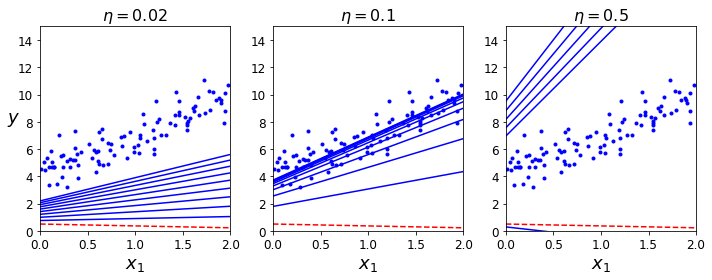

In [22]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [23]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


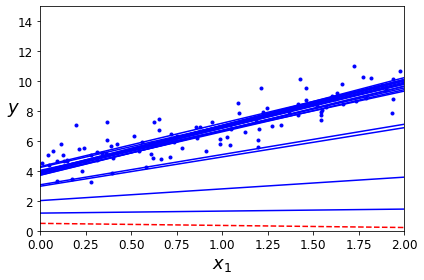

In [24]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:           
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                 
plt.show()

In [25]:
theta

array([[4.21076011],
       [2.74856079]])

#### Stochastic gradient descent
**SGD** computes the gradient by a random instance picked in each step, which can be carried out as an out-of-core algorithm. It, however, may never settle down at the global minimum but may jump out of the local minima of irregular cost functions. A solution to this dilemma is to gradually reduce $\mathbf{\eta}$ by a ***learning schedule function***, similar to the ***simulated annealing algorithm***. This way, we go into the training set only in each round or ***epoch***, then iterate on it. Here, the samples should be independent and uniformly distributed. For this and also to ensure unique sampling, the training set can be shuffled in each epoch by default in `SGDRegressor`.  

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

#### Mini-batch gradient descent
**MGD** is a trade-off between above methods, working on small subsets of the training set, which may also be optimizable by matrix operations, for example, in GPUs. It can also be shuffled in each epoch by `np.random.permutation(len(X_b))`.  

In [28]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [29]:
theta

array([[4.25214635],
       [2.7896408 ]])

---------

Comparsion of all GD algorithms

In [30]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


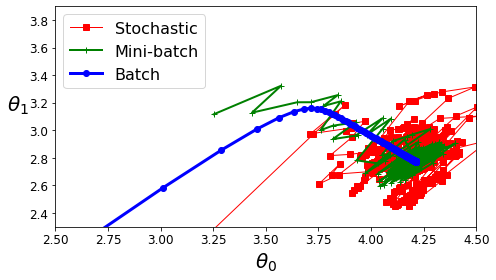

In [31]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial regression

`PolynomialFeatures` adds powers to each feature combination, which can also determine their relationships. Then, it is solved by a new linear problem.

E.g., the quadratic form, i.e., $[a, b]$, with `degree=2`, the polynomial features become $[1, a, b, a^2, ab, b^2]$.

In [34]:
import numpy as np

np.random.seed(42)

In [62]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [64]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99958228]), array([[1.04630034, 0.5015459 ]]))

Saving figure quadratic_predictions_plot


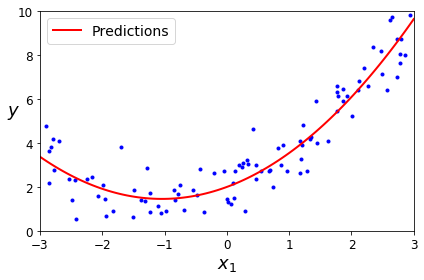

In [65]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

High-degree polynomial regression is not only expensive but also prone to overfitting.

Saving figure high_degree_polynomials_plot


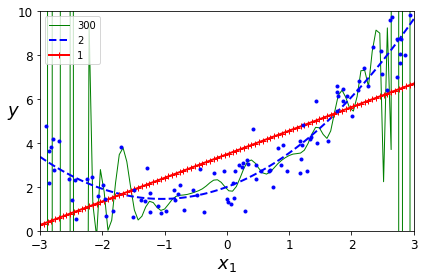

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

The **learning curves**, i.e., performance on training and validation sets vs. training size, can demonstrate the ***bias/variance trade-off***.

For this example, While an underfitted model is less affected by adding more samples, it has a smaller gap between two performance values, although they have higher values comparing to an overfitted model. Additionally, these curves can show the ***irreducible errors***, for example, because of the noises, cannot be removed even if the training size increases.

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14) 
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)            

Saving figure underfitting_learning_curves_plot


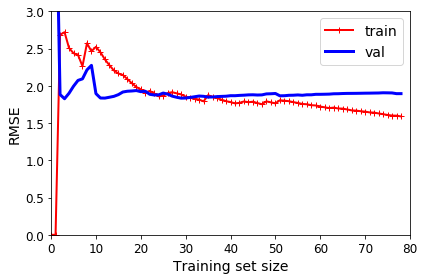

In [68]:
# Underfitted model:

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                      
save_fig("underfitting_learning_curves_plot")
plt.show()                                   

Saving figure learning_curves_plot


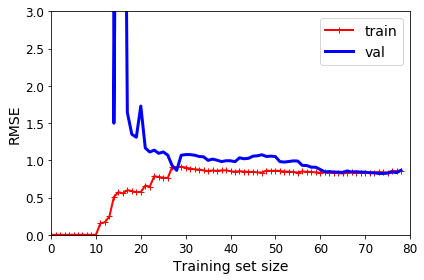

In [69]:
# Overfitted model:

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])         
save_fig("learning_curves_plot")
plt.show()

## Regularized models
To address overfitting, we can constraint it by reducing the DOF or epoch numbers. For example, the model weights $\mathbf{w}=\mathbf{\theta}$ can be minimized via the training cost functions. Use the unregularized performance measure after training.

<img src="img/Picture6.jpg" width="400px">
<center>Source: kdnuggets.com</center>

### Ridge and Lasso
**Ridge** (or **Tikhonov**) regularization term (or **$l_2$ penalty**) is $\alpha\frac{1}{2}\left \| \mathbf{w} \right \|_{2}^{2}$, which keeps the weights small, without penalizing the bias. Then, the *ridge regression cost function* becomes:

\begin{equation}
J\left(\mathbf{\theta}\right)=MSE\left(\mathbf{\theta}\right)+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^\mathbf{2}
\end{equation}

The following closed-form solution can be applied via a matrix factorization technique by `solver="cholesky"` option in Ridge:

\begin{equation}
\hat{\mathbf{\theta}}=\left(\mathbf{X}^T\mathbf{X}+\alpha\mathbf{A}\right)^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}

Where $\mathbf{A}$ is $\ (n+1)\times(n+1)$ identity matrix.

In [70]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

Also, `"svd"`, and for GD, `"sag"` or, the more improved, unbiased version, `"saga"` can be used, which is equivalent to `SGDRegressor(penalty="l2"`).

In [72]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [73]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

For comparison, the predictions of some regularized linear and polynomial forms of a noisy linear model were plotted. As shown, the models converged to the mean values by increasing \alpha.  

Saving figure ridge_regression_plot


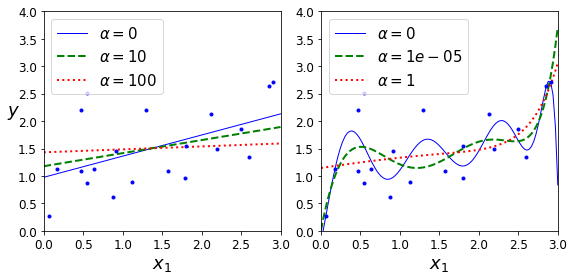

In [74]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

### Lasso
Similarly, **Least Absolute Shrinkage and Selection Operator Regression** (**Lasso**) can be executed, which uses $l_1$ norm of the weight vector instead of half the square of the $l_2$ norm:

\begin{equation}
J\left(\mathbf{\theta}\right)=MSE\left(\mathbf{\theta}\right)+\alpha\sum_{i=1}^{n}\left|\theta_i\right|
\end{equation}

it automatically implements feature selection and outputs a sparse model as it tends to eliminate the high-degree polynomial features. But its GD may fluctuate around the global optimum more than Ridge, and it may not be differentiable. Therefore, the ***subgradient vector g*** should be used:

\begin{equation}
g\left(\mathbf{\theta},J\right)=\nabla_\mathbf{\theta}MSE\left(\mathbf{\theta}\right)+\alpha\left(\begin{matrix}sign\left(\theta_1\right)\\\vdots\\sign\left(\theta_n\right)\\\end{matrix}\right) ,        sign\left(\theta_i\right)=\ \left\{\begin{matrix}-1&\theta_i<0\\0&\theta_i=0\\+1&\theta_i>0\\\end{matrix}\right.
\end{equation}

C:\Users\Seyed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8028677038274434, tolerance: 0.0009294783355207351
  positive)


Saving figure lasso_regression_plot


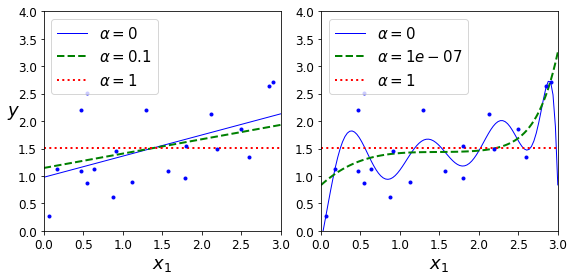

In [75]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [76]:
# or you may use SGDRegressor(penalty="l1")

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic net
`ElasticNet` is middle ground between above regularization methods, controlled by mix ratio *r* (`l1_ratio`):

\begin{equation}
J\left(\mathbf{\theta}\right)=MSE\left(\mathbf{\theta}\right)+r\alpha\sum_{i=1}^{n}\left|\theta_i\right|+\alpha\frac{1-r}{2}\sum_{i=1}^{n}\theta_i^\mathbf{2}
\end{equation}

Always, have a bit of regularization, typically by Ridge. Otherwise to focus on important features, prefer *Elastic Net* as Lasso may behave erratically when some features are strongly correlated, or when the number of features is greater than that of instances.

In [77]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early stopping
As it is called a ***"beautiful free lunch"***, for iterative learning algorithms, such as GD, it stops training when the validation error is minimized or, for non-smooth response, is above the minimum for some time. For implementation, use `warm_start=True` option in each `fit()` to continue training following each epoch.

<img src="img/Picture9.png" width="400px">
<center>Early Stopping method [10]</center>

In [78]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [79]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [80]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

## Logistic regression
**Logistic** (or **Logit**) Regression performs binary classification by probability estimation of a weighted sum of features (with bias):

\begin{equation}
\hat{p}=h_\mathbf{\theta}\left(\mathbf{x}\right)=\sigma\left(\mathbf{x}^T\mathbf{\theta}\right)
\end{equation}

The **logistic** function is a **sigmoid** function (i.e., S-shaped), is:

\begin{equation}
\sigma\left(t\right)=\frac{1}{1+exp\left(-t\right)}
\end{equation}

Saving figure logistic_function_plot


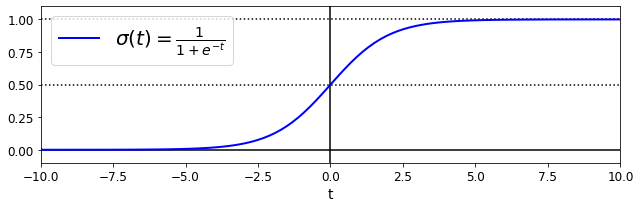

In [85]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

Its inverse function for **score** *t* (**logit**) is **log-odds** (**logit**) function by probability *p*:

\begin{equation}
t=logit\left(p\right)=log\left(\frac{p}{1-p}\right)
\end{equation}

Therefore, the Logistic Regression prediction is:

\begin{equation}
\hat{y}=\ \left\{\begin{matrix}0&if\ \ \hat{p}<0.5\ \ or\ {\ \mathbf{x}}^\mathit{T}\mathbf{\theta}<0\\1&if\ \ \hat{p}\geq0.5\ \ or\ {\ \mathbf{x}}^\mathit{T}\mathbf{\theta}\geq0\\\end{matrix}\right.
\end{equation}

With logistic regression cost function (**log loss**):

\begin{equation}
J\left(\mathbf{\theta}\right)=-\frac{1}{m}\sum_{i=1}^{m}\left[y^{\left(i\right)}log({\hat{p}}^{\left(i\right)})+\left({1-y}^{\left(i\right)}\right)log(1-{\hat{p}}^{\left(i\right)})\right]
\end{equation}

This convex function does not have a closed-form solution, but its partial derivatives is:

\begin{equation}
\frac{\partial}{\partial\theta_j}J\left(\mathbf{\theta}\right)=\frac{1}{m}\sum_{i=1}^{m}{\left(\sigma\left(\mathbf{x}^T\mathbf{\theta}\right)-y^{\left(i\right)}\right)x_j^{\left(i\right)}}
\end{equation}

E.g. the *Iris* dataset was downloaded to run a binary classification by `.astype(np.int)` of target values.

In [86]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [87]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [100]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

Then, `LogisticRegression()` and for prediction `np.linspace(0, 3, 1000).reshape(-1, 1)` were used. Here, -1 implies an unspecified dimension. To show the ***decision boundary*** `.predict_proba()` was executed. Generally, these classifications can be implemented by different solvers with regularization hyperparameters as before. Here, $l_2$ is default but it is controlled by `C`, the inverse of `alpha`.

In [102]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Saving figure logistic_regression_plot


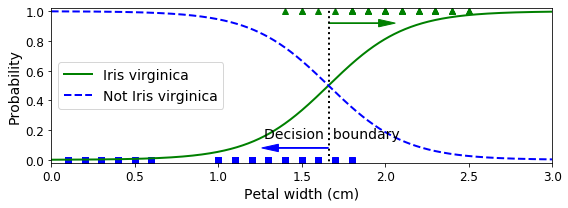

In [115]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [119]:
decision_boundary

array([1.66066066])

In [120]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax regression
To directly implement **Multinomial Logistic Regression**, on condition that it is mutually exclusive classes (not multioutput), the **softmax function** should be used:

\begin{equation}
{\hat{p}}_k=\sigma\left(\mathbf{s}\left(\mathbf{x}\right)\right)_k=\frac{exp\left(s_k\left(\mathbf{x}\right)\right)}{\sum_{j=1}^{K}exp\left(s_j\left(\mathbf{x}\right)\right)}
\end{equation}

Which is differentiable and normalized by exponential of each score $s_k$ (AKA ***logits*** or ***unnormalized log-odds***) with respect to category $k$ among $K$ groups by

\begin{equation}
s_k\left(\mathbf{x}\right)=\mathbf{x}^T\mathbf{\theta}^{\left(k\right)}
\end{equation}

Therefore, the highest estimated probability corresponds to the category, which can be found by **cross entropy cost function**:

\begin{equation}
J\left(\mathbf{\Theta}\right)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\left[y_k^{\left(i\right)}log({\hat{p}}_k^{\left(i\right)})\right]
\end{equation}

$y_k^{\left(i\right)}$ is the target probability that the $i^{th}$ instance belongs to class $k$, $\mathbf{\Theta}$ stores row vectors of $\mathbf{\theta}^{\left(k\right)}$. The cross entropy $H$ between two probability distributions $p$ and $q$ is $H\left(p,q\right)=-\sum_{x} p\left(x\right)log\left(q\left(x\right)\right)$ [11]. The concept comes from information theory that states that for efficient encoding of the signals the number of bits of the highest probable cases should be shortened, which can be computed by its ***uncertainty***, the inverse of probability. Then, it should be compared with the ***entropy***, which only considers the true distribution probabilities (i.e., $p=q$). The difference shows the quality of our assumption predictions, by **Kullback–Leibler (KL) divergence** (or **relative entropy)**: $D_{KL}\left(p\parallel q\right)=H\left(p,q\right)-H\left(p\right)$.

Finally, the following gradient vector for each class can be used:

\begin{equation}
\nabla_{\mathbf{\theta}^{\left(k\right)}}J\left(\mathbf{\Theta}\right)=\frac{1}{m}\sum_{i=1}^{m}{\left({\hat{p}}_k^{\left(i\right)}-y_k^{\left(i\right)}\right)\mathbf{x}^{\left(i\right)}}
\end{equation}

By default, LogisticRegression applies OvR classification. For softmax, the hyperparameter `multi_class="multinomial"` should be set with a supported solver, e.g., `"lbfgs"`.

In [141]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
softmax_reg.predict([[5, 2]])

array([2])

In [144]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

To plot the decision boundaries, use `.contour(..., cmap=plt.cm.brg)`, and for contours of each class use `.contourf()` with ListedColormap(). The input data of these contour functions should be formed by `.meshgrid()`, while for prediction inputs use `.c_[x0.ravel(), x1.ravel()]`, which concatenates along the $2^{nd}$ axis.  

Saving figure softmax_regression_contour_plot


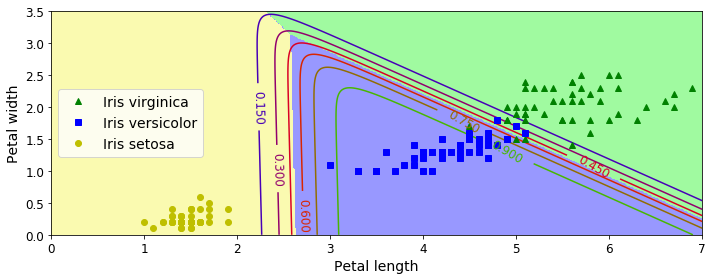

In [160]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

## References:

[7]	E. Bendersky, “Derivation of the Normal Equation for linear regression - Eli Bendersky’s website.” https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression (accessed May 22, 2020).

[8]	“Introduction to Singular Value Decomposition using Python/Numpy examples and drawings.” https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/ (accessed May 23, 2020).

[9]	J. Hui, “Machine Learning — Singular Value Decomposition (SVD) & Principal Component Analysis (PCA),” 2019. https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491 (accessed May 23, 2020).

[10]	A. Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, 2nd ed. O’Reilly Media, 2019.

[11]	Aurélien Géron, “A Short Introduction to Entropy, Cross-Entropy and KL-Divergence - YouTube.” https://www.youtube.com/watch?v=ErfnhcEV1O8 (accessed Jun. 06, 2020).

[12]	G. Cauwenberghs and T. Poggio, “Incremental and decremental support vector machine learning,” 2001.